# Forecasting the stock price
We are using historical data of SBI share price between 2015 to 2020 and apply a simple model to forecast for 2021

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Converting Date](#Converting_Date)
    - 3.4 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.5 - [Indexing with Date](#Indexing_with_Date)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
        - 4.3.2 - [ADF Test](#ADF)
        - 4.3.2 - [KPSS Test](#KPSS)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Parameter Selection](#Parameter_Selection)
    - 5.2 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.3 - [Validating Forecasts](#Validating_Forecasts)
    - 5.4 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)
    - 5.6 - [Comparing the predictions](#Comparing_the_predictions)
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Packages

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

<a id='load_data'></a>
# 2. Load Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Load the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
stock_raw_data = pd.read_csv('SBI_Historical_Data.csv')
stock_raw_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


<a id='data_preparation'></a>
# 3. Data Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Converting date into standard format<br> 
                        4. Check for missing values<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [3]:
stock_raw_data.shape

(1385, 7)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [4]:
stock_raw_data.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


<a id='Converting_Date'></a>
## 3.3 Converting Date

In [5]:
stock_data = stock_raw_data.copy(deep=True)

In [6]:
stock_data['Date'] = stock_data['Date'].apply(lambda x : pd.to_datetime(x))

In [7]:
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


<a id='check_data_type'></a>
## 3.4 Checking for Missing Values 

In [8]:
# summary of the data 
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


Checking the stock time stamp

In [9]:
stock_data['Date'].min(), stock_data['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-08-07 00:00:00'))

We remove the columns that we do not need as well as check missing values

In [10]:
cols = ['Vol.','Open','High','Low','Change %']
stock_data_1 = stock_data.drop(cols, axis=1)
stock_data_1 = stock_data_1.sort_values('Date')

Checking for null values

In [11]:
stock_data_1.isnull().sum()

Date     0
Price    0
dtype: int64

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There are no missing values<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Indexing_with_Date'></a>
## 3.5 Indexing with Date

Aggregate price by date

In [12]:
stock_data_1 = stock_data_1.groupby('Date')['Price'].sum().reset_index()

In [13]:
stock_data_1['Date'] = pd.to_datetime(stock_data_1['Date'])
stock_data_1.set_index('Date', inplace=True)
stock_data_1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [14]:
stock_data_1.head()

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we analysis Time series data to do so we need to perform following steps <br><br>
                        1. Visualizing Data <br>
                        2. Sampling<br>
                        3. Checking Stationarity <br>
                        4. Decomposing<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

Text(0.5, 0, 'Year')

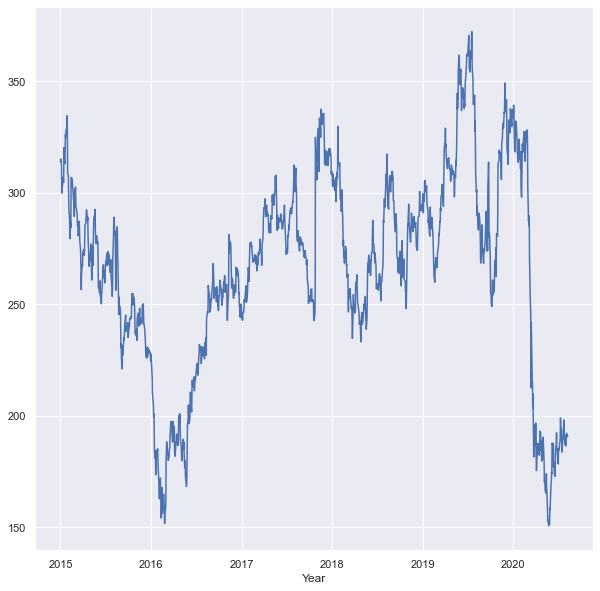

In [16]:
### Plot 5 years data

fig = plt.figure(figsize=(10,10))
plt.plot(stock_data_1)
plt.xlabel("Year")


There are majority of upward trend within any single year with a couple of low months in the mid of the year

<a id='Sampling'></a>
## 4.2 Sampling

In [17]:
data = stock_data_1['Price'].resample('MS').mean()

In [18]:
data.head()

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
Freq: MS, Name: Price, dtype: float64

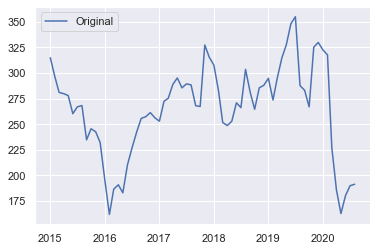

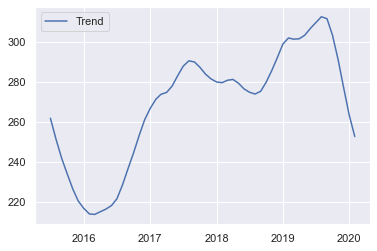

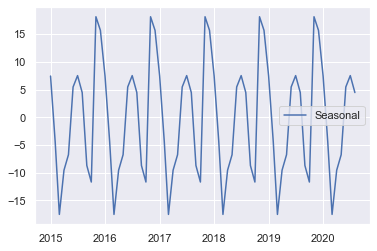

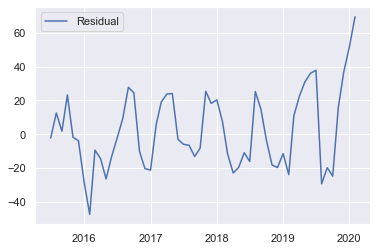

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<a id='Checking_Stationarity'></a>
## 4.3 Checking Stationarity


**Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.**

<a id='ADF'></a>
### 4.3.1 Augmented Dickey-Fuller(ADF) Test
   

* Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. 
* It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

* If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). 
* When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary)

In [22]:
#apply adf test on the series
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.460279
p-value                         0.125440
#Lags Used                      1.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


**The test statistic > critical value, Hence we accept the null hypothesis which implies that the series is  not stationary**

<a id='KPSS'></a>
### 4.3.2 KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test


Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [23]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c',nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [24]:
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.141737
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/home/coder/Desktop/VirtualEnv/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


**The test statistic < critical value, we reject the null hypothesis which implies that the series is  not stationary**

It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

* Case 1: Both tests conclude that the series is not stationary -> series is not stationary
* Case 2: Both tests conclude that the series is stationary -> series is stationary
* Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
* Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

**After performing two test we concluded that series is not stationary**

Differencing to Remove Seasonality


In [25]:
data = data - data.shift(1)

<AxesSubplot:xlabel='Date'>

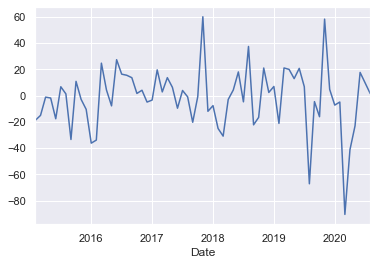

In [26]:
data.dropna(inplace=True)
data.plot()

### As you can see, this plot is a significant improvement over the previous plots

<a id='Decomposing'></a>
### 4.4  Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

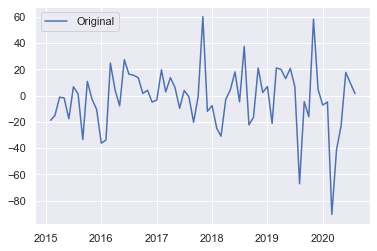

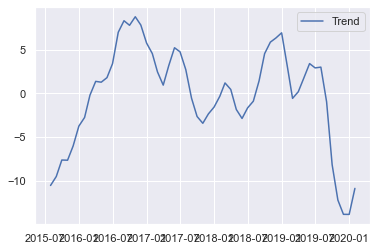

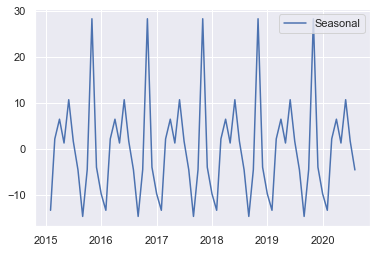

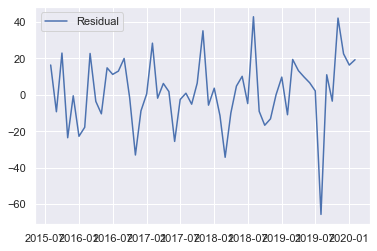

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

By visualizing the decomposed components of the original time series we can say that the price of stock is unstable, along with its obvious seasonality.

<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [40]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


**Split the data into train and test**

In [41]:
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]

In [42]:
test.head()

Date
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

<a id='Parameter_Selection'></a>
## 5.1 Parameter Selection 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.0176020406126
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:468.4171077287856
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:496.6096221951665
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:366.51316429620897
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:477.6963736316133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:468.05799304982486
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:369.7808848651431
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:358.72164913776146
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:565.3557946844729
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:460.32600113071715
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.6081887080062
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:360.57295689647736
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:479.1909096997687
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:460.83011730176594
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:371.65469212432026
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:352.1593103291258
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:597.0631111621733
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:485.178017728116
ARIM

In [32]:
min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We are selecting those parameter which has minimum AIC score</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Fitting_the_ARIMA'></a>
## 5.2 Fitting the ARIMA model

In [43]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0815      0.221     -4.904      0.000      -1.514      -0.649
ar.S.L12      -0.8119      0.164     -4.950      0.000      -1.133      -0.490
ma.S.L12      -0.2666      0.370     -0.721      0.471      -0.992       0.458
sigma2       603.2602    245.876      2.454      0.014     121.351    1085.169


**Running model diagnostiscs to check any unusual behaviour**

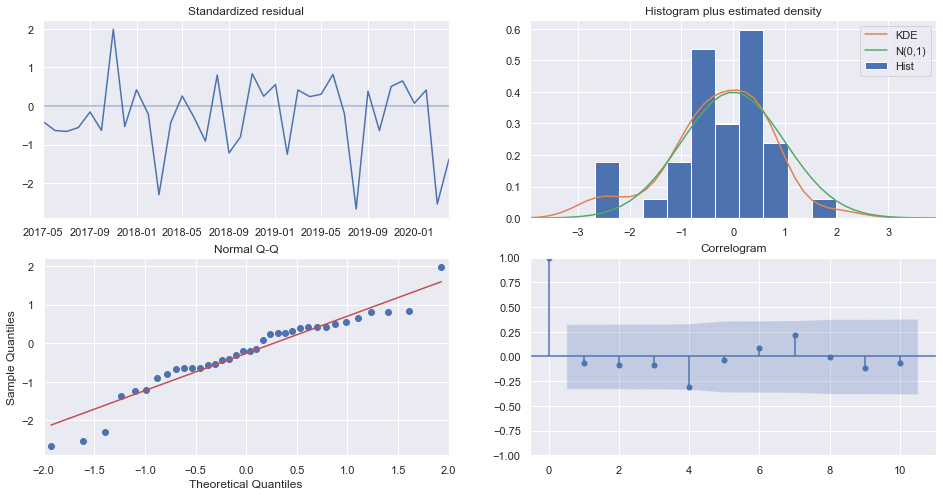

In [34]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The model diagnostics indicates that the model residuals are near normally distributed</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Validating_Forecasts'></a>
## 5.3 Validating Forecasts

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts</b>
                </font>
            </div>
        </td>
    </tr>
</table>

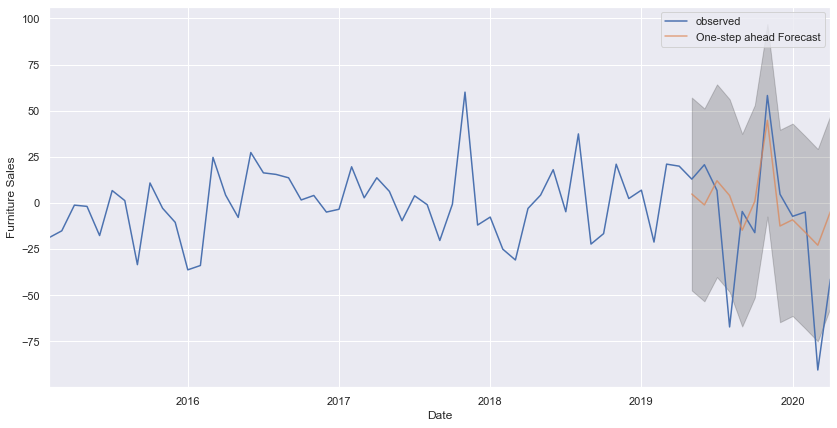

In [35]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.4 Calculating MSE and RMSE


In [36]:
y_forecasted = pred.predicted_mean
y_truth = train['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1045.02
The Root Mean Squared Error of our forecasts is 32.33


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily stock price in the test set within 32.33 of the price.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 


            lower Price  upper Price
2020-05-01   -55.669638    48.537550
2020-06-01   -47.006411    57.495756
2020-07-01   -61.537801    43.258515
2020-08-01   -23.654345    81.435297
2020-09-01   -80.679305    24.702846
2020-10-01   -71.372928    34.300922
2020-11-01   -34.739606    71.225141
2020-12-01   -61.349790    44.905058
2021-01-01   -56.319576    50.224596
2021-02-01   -81.333867    25.505060
2021-03-01   -42.571019    64.555633
2021-04-01   -41.223831    66.189777
2021-05-01   -48.823428    58.578267


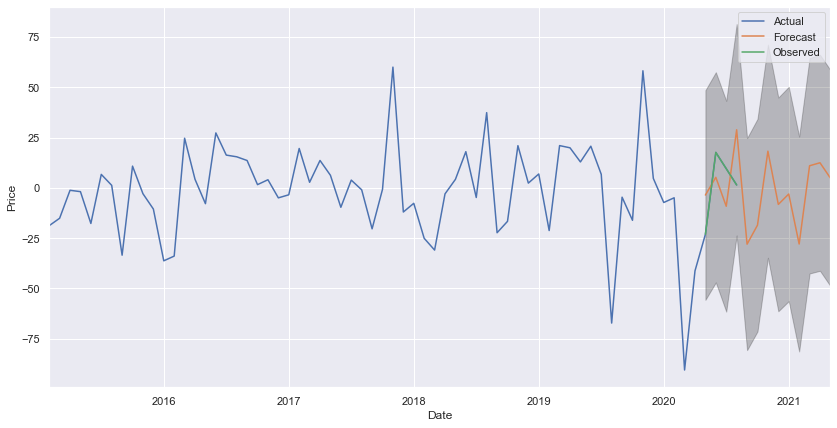

In [37]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

<a id="Comparing_the_predictions"> </a>
## 5.6 Comparing the predictions

In [38]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Price']
Result

,Actual,Predicted
Date,,
2020-05-01,-23.078070,48.537550
2020-06-01,17.622010,57.495756
2020-07-01,9.550988,43.258515
2020-08-01,1.451739,81.435297


In [39]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 3563.07
The Root Mean Squared Error of our forecasts is 59.69


<a id="Conclusion"> </a>
# Conclusion

The stock price increases and decrease irrespective of the season. Stock price can analyised using a multivariate time series